In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix


In [3]:
df=pd.read_csv("/kaggle/input/hr-analytics/HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
#Rename columns
df.columns = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'left', 'hadPromotion', 'department', 'salary']

In [5]:
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,hadPromotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   satisfaction         14999 non-null  float64
 1   evaluation           14999 non-null  float64
 2   projectCount         14999 non-null  int64  
 3   averageMonthlyHours  14999 non-null  int64  
 4   yearsAtCompany       14999 non-null  int64  
 5   workAccident         14999 non-null  int64  
 6   left                 14999 non-null  int64  
 7   hadPromotion         14999 non-null  int64  
 8   department           14999 non-null  object 
 9   salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Exclude categorical variables
df_numeric = df.select_dtypes(exclude='object')

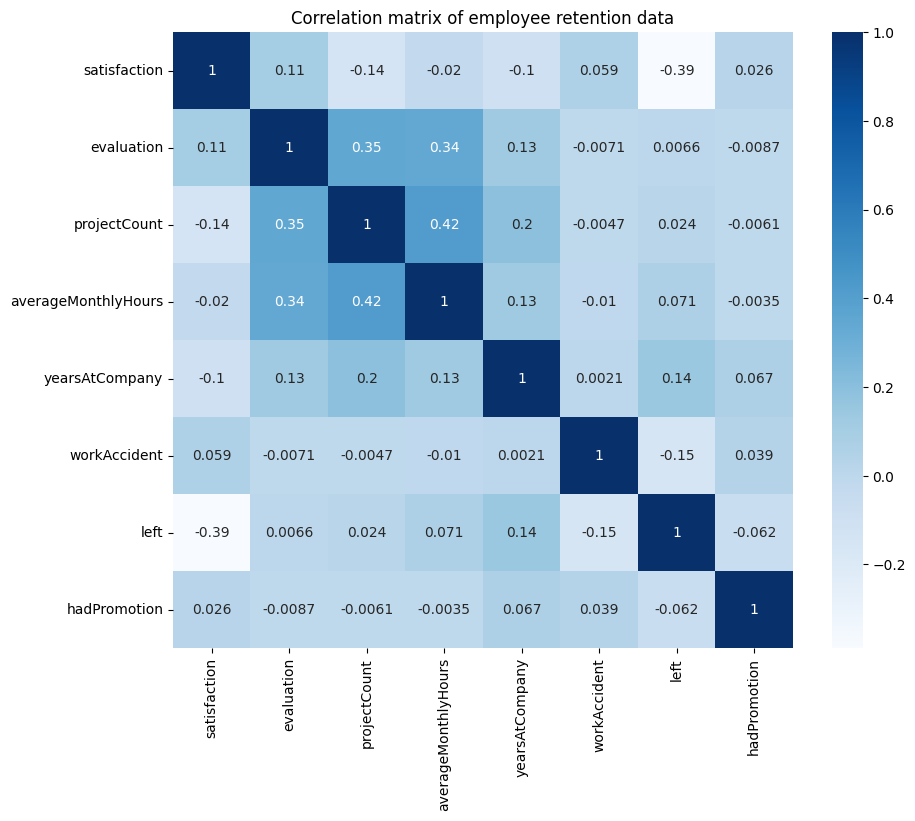

In [8]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.title('Correlation matrix of employee retention data')
plt.show()

In [9]:
# Select variables with high absolute correlation with target variable (left)
# You can also use other feature selection methods such as chi2, f_classif, or mutual_info_classif
selected_vars = ['satisfaction', 'projectCount', 'yearsAtCompany', 'workAccident', 'hadPromotion']

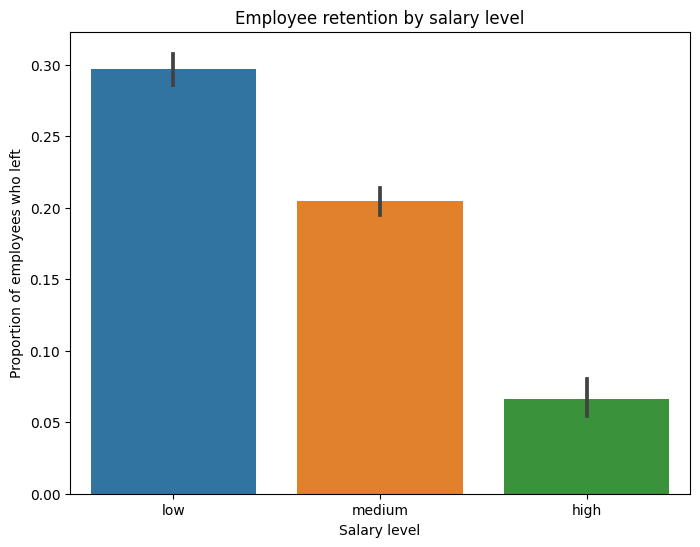

In [10]:
# Plot bar charts showing impact of employee salaries on retention
plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='left', data=df)
plt.title('Employee retention by salary level')
plt.xlabel('Salary level')
plt.ylabel('Proportion of employees who left')
plt.show()

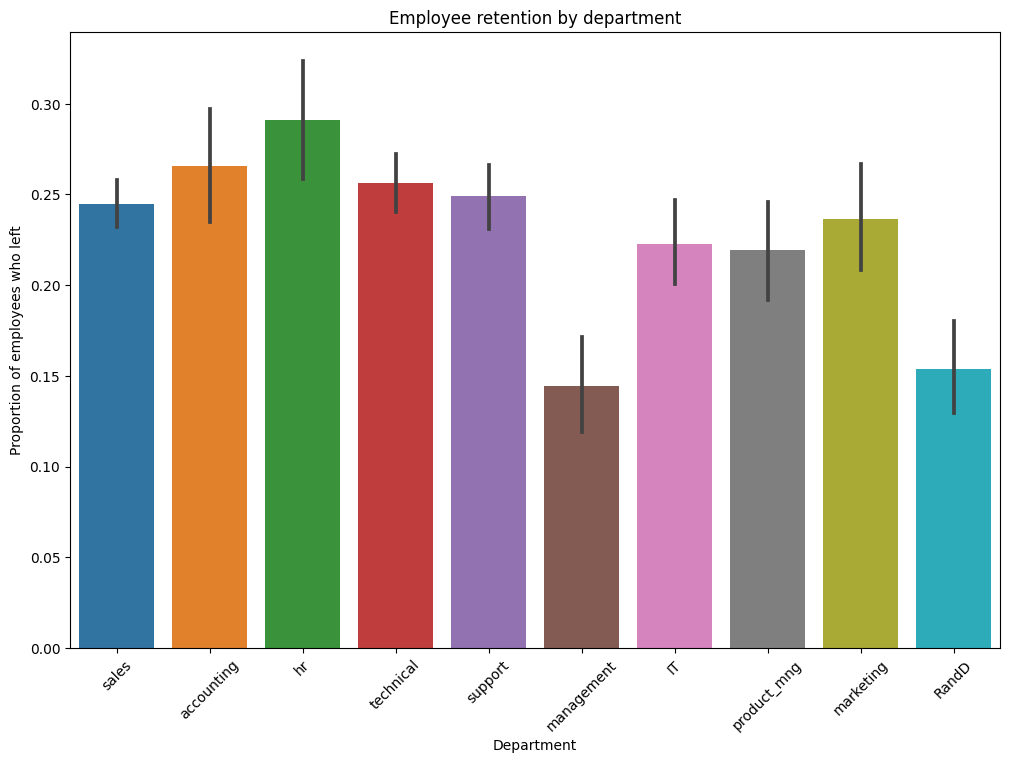

In [11]:
# Plot bar charts showing corelation between department and employee retention
plt.figure(figsize=(12, 8))
sns.barplot(x='department', y='left', data=df)
plt.title('Employee retention by department')
plt.xlabel('Department')
plt.ylabel('Proportion of employees who left')
plt.xticks(rotation=45)
plt.show()

In [12]:
#Building Logistic regression model u
X = df[selected_vars]
y = df['left']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [13]:
# Evaluate the performance of the model using various metrics
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.751


In [14]:
print('Precision:', precision_score(y_test, y_pred))

Precision: 0.44321329639889195


In [15]:
print('Recall:', recall_score(y_test, y_pred))

Recall: 0.22662889518413598


In [16]:
print('F1-score:', f1_score(y_test, y_pred))

F1-score: 0.29990627928772257


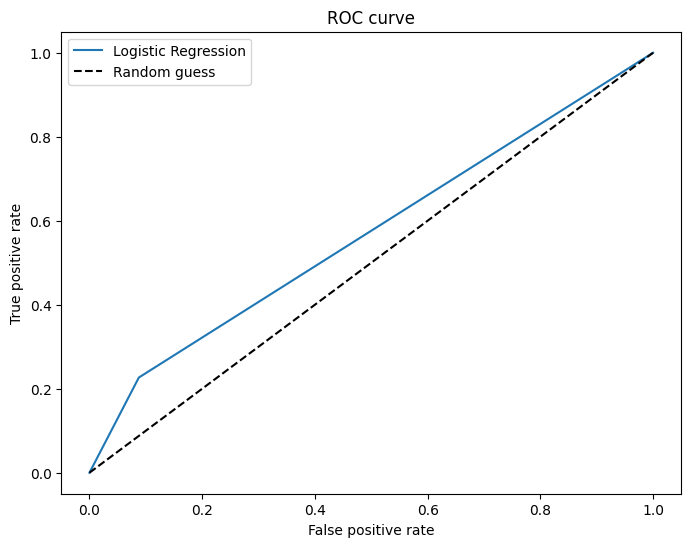

In [17]:
# Plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


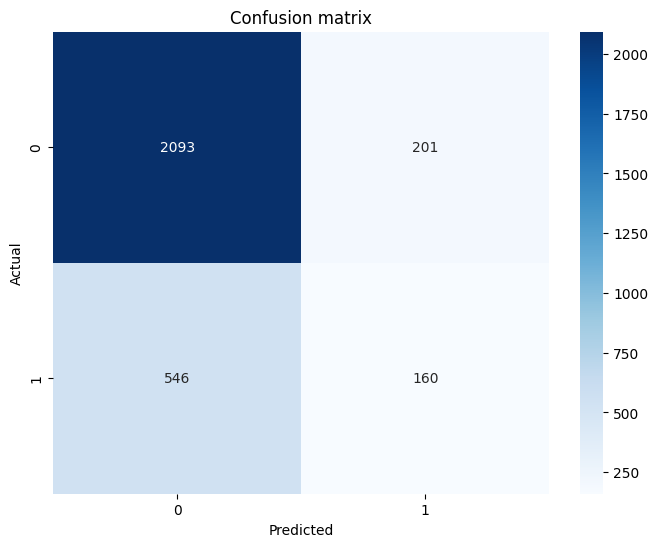

In [18]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()
